In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [36]:
# Calculate the date 1 year ago from the last data point in the database
final_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(final_date)

('2017-08-23',)


In [37]:
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print("One year before final date: ", year_ago)

One year before final date:  2016-08-23


In [38]:
# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= dt.date(2016,8,23))
for d in data:
    print(d)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-06-04', 0.13)
('2017-06-05', 0.05)
('2017-06-06', 0.0)
('2017-06-07', 0.0)
('2017-06-08', 0.0)
('2017-06-09', 0.02)
('2017-06-10', 0.62)
('2017-06-11', 0.74)
('2017-06-12', 0.24)
('2017-06-13', 0.24)
('2017-06-14', 0.22)
('2017-06-15', 0.55)
('2017-06-16', 0.06)
('2017-06-17', 0.07)
('2017-06-18', 0.24)
('2017-06-19', 0.08)
('2017-06-20', 0.0)
('2017-06-21', 0.19)
('2017-06-22', 0.06)
('2017-06-23', 0.12)
('2017-06-24', 0.36)
('2017-06-25', 0.02)
('2017-06-26', 0.06)
('2017-06-27', 0.01)
('2017-06-28', 0.0)
('2017-06-29', 0.0)
('2017-06-30', 0.01)
('2017-07-01', 0.08)
('2017-07-02', 0.15)
('2017-07-03', 0.15)
('2017-07-04', 0.08)
('2017-07-05', 0.0)
('2017-07-06', 0.0)
('2017-07-07', 0.18)
('2017-07-08', 0.0)
('2017-07-09', 0.11)
('2017-07-10', 0.02)
('2017-07-11', 0.02)
('2017-07-12', 0.28)
('2017-07-13', 0.32)
('2017-07-14', 0.2)
('2017-07-15', 0.05)
('2017-07-16', 0.1)
('2017-07-17', 0.21)
('2017-07-18', 0.05)
('2017-07-19', 0.05)
('2017-07-20', 0.06)
('2017-07-21', 0.03)
('2

In [ ]:
# Save the query results as a Pandas DataFrame and set the index to the date column
climate = pd.DataFrame(data, columns = ["date", "prcp"])
climate.set_index("date", inplace=True)
# Sort the dataframe by date
climate = climate.sort_values(["date"])
climate.head(10)

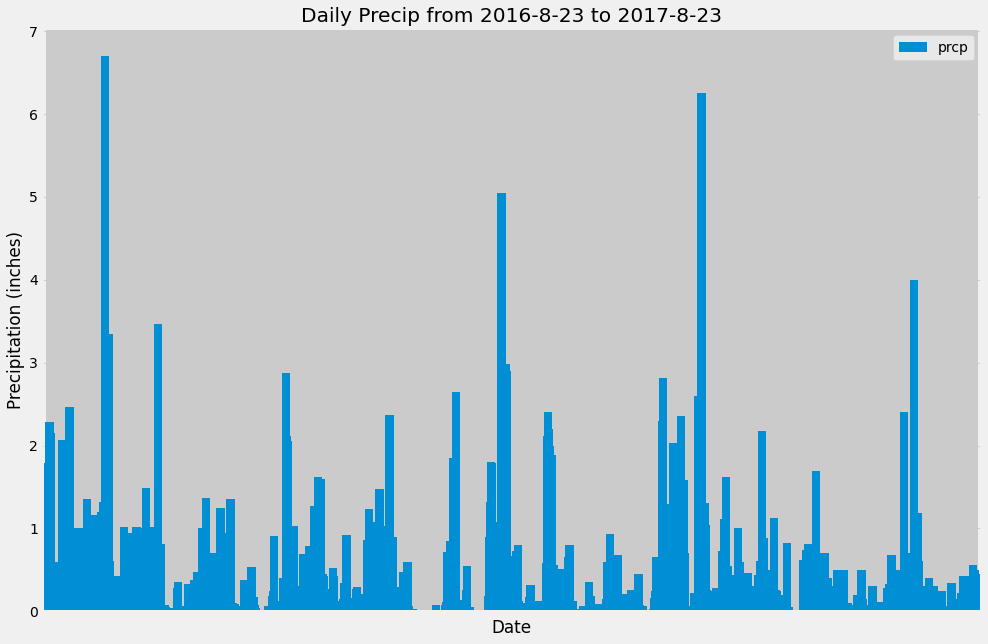

In [39]:
# Use Pandas Plotting with Matplotlib to plot the data

ax = climate.plot.bar(figsize=(15,10), width=20)
ax.set_title("Daily Precip from 2016-8-23 to 2017-8-23")
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation (inches)")
#set x label ticks blank to prevent a black line of overlapping dates.
ax.set_xticklabels([])
plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats = climate["prcp"].describe()
stats_df = pd.DataFrame(stats)
stats_df.head()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000


In [23]:
# Design a query to show how many stations are available in this dataset?
session.query(station.id).count()

9

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
selection = [measurement.station,func.count(measurement.id)]
stations_act = session.query(*selection).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).all()
stations_act

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# find most active station
most_active = stations_act[0]
most_active

('USC00519281', 2772)

In [35]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
## most active station: USC00519281 
session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station=='USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [48]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
##most_temps = session.query(measurement.tobs)
most_temps = session.query(measurement.station, measurement.date, measurement.tobs).filter(measurement.date >= dt.date(2016,8,23),(measurement.station=='USC00519281'))
for t in most_temps:
    print(t)

('USC00519281', '2016-08-23', 77.0)
('USC00519281', '2016-08-24', 77.0)
('USC00519281', '2016-08-25', 80.0)
('USC00519281', '2016-08-26', 80.0)
('USC00519281', '2016-08-27', 75.0)
('USC00519281', '2016-08-28', 73.0)
('USC00519281', '2016-08-29', 78.0)
('USC00519281', '2016-08-30', 77.0)
('USC00519281', '2016-08-31', 78.0)
('USC00519281', '2016-09-01', 80.0)
('USC00519281', '2016-09-02', 80.0)
('USC00519281', '2016-09-03', 78.0)
('USC00519281', '2016-09-04', 78.0)
('USC00519281', '2016-09-05', 78.0)
('USC00519281', '2016-09-06', 73.0)
('USC00519281', '2016-09-07', 74.0)
('USC00519281', '2016-09-08', 80.0)
('USC00519281', '2016-09-09', 79.0)
('USC00519281', '2016-09-10', 77.0)
('USC00519281', '2016-09-11', 80.0)
('USC00519281', '2016-09-12', 76.0)
('USC00519281', '2016-09-13', 79.0)
('USC00519281', '2016-09-14', 75.0)
('USC00519281', '2016-09-15', 79.0)
('USC00519281', '2016-09-16', 78.0)
('USC00519281', '2016-09-17', 79.0)
('USC00519281', '2016-09-18', 78.0)
('USC00519281', '2016-09-19'

In [45]:
# Save the query results as a Pandas DataFrame and set the index to the date column
most_temps_df = pd.DataFrame(most_temps, columns = ["date", "prcp"])
most_temps_df.set_index("date", inplace=True)
# Sort the dataframe by date
most_temps_df = most_temps_df.sort_values(["date"])
most_temps_df.head(10)

ValueError: 2 columns passed, passed data had 3 columns

## Bonus Challenge Assignment

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
